In [1]:
pip install  pandas matplotlib numpy seaborn statsmodels geopandas fuzzywuzzy


  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.1.0-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using ca

In [4]:
import geopandas as gpd
#load geojson
bogota_gdf = gpd.read_file("../data/poligonos-localidades.geojson")
bogota_gdf.head(20)


,Nombre de la localidad,Acto administrativo de la localidad,Area de la localidad,Identificador unico de la localidad,geo_point_2d,geometry
0,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"{ ""lon"": -74.161958904406518, ""lat"": 4.4824602...","MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4..."
1,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"{ ""lon"": -74.075845275546897, ""lat"": 4.7632081...","MULTIPOLYGON (((-74.0345 4.82547, -74.03489 4...."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"{ ""lon"": -74.113363182935245, ""lat"": 4.5664769...","MULTIPOLYGON (((-74.12803 4.59254, -74.12829 4..."
3,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"{ ""lon"": -74.152667623833821, ""lat"": 4.6303473...","MULTIPOLYGON (((-74.1183 4.63741, -74.11854 4...."
4,USME,Acuerdo 15 de 1993,"215066686,644374",05,"{ ""lon"": -74.142806495819357, ""lat"": 4.3900251...","MULTIPOLYGON (((-74.05597 4.50832, -74.05599 4..."
5,LOS MARTIRES,Acuerdo 8 de 1977,"6514046,260403",14,"{ ""lon"": -74.08794786812679, ""lat"": 4.60715593...","MULTIPOLYGON (((-74.07283 4.61542, -74.07296 4..."
6,ANTONIO NARIÑO,Acuerdo 117 de 2003,"4879543,386426",15,"{ ""lon"": -74.102842400614492, ""lat"": 4.5887706...","MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4..."
7,TEUSAQUILLO,Acuerdo 8 de 1977,"14193168,127546",13,"{ ""lon"": -74.085769019581434, ""lat"": 4.6411735...","MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4..."
8,SUMAPAZ,Acuerdo 9 de 1986,"780968757,719072",20,"{ ""lon"": -74.256978718004689, ""lat"": 4.0365687...","MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4..."
9,SAN CRISTOBAL,Acuerdo 117 de 2003,"49098548,52917",04,"{ ""lon"": -74.066072560506484, ""lat"": 4.5487490...","MULTIPOLYGON (((-74.029 4.5583, -74.02892 4.55..."


## Data Transformation and Preparation

In [5]:

import pandas as pd
from fuzzywuzzy import fuzz
mpox=pd.read_csv('../data/osb_enftransm_mpox23082024.csv', sep=';', encoding='ISO-8859-1', parse_dates=True)
print(mpox.info())


'''
This function takes a name and a list of names and returns the best match. If the score is above the threshold -1 is returned.
Why? 
mpox dataframe has a column called 'Localidad' and bogota_gdf has a column called 'Nombre de la localidad'. 
Both columns have the same information but the names are not exactly the same. 
This function will help us to match the names of the localities in both dataframes.
'''
def match_names(name, list_names, min_score=0):
    # -1 score to the name
    max_score = -1
    # Returning empty name for no match
    max_name = ""
    for name2 in list_names:
        # Finding fuzzy match score
        score = fuzz.ratio(name.lower(), name2.lower())
        # Checking if the score is greater than the minimum score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

#Create localities dataframe in order to match the names of the localities in both dataframes
dict_list = []
for name in mpox['Localidad'].unique():
    # Use the function to find best match, we can set a threshold here
    match = match_names(name, bogota_gdf['Nombre de la localidad'].unique(), 60)
    # New dict for storing data
    dict_ = {}
    dict_.update({"locality_name" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
    
localities= pd.DataFrame(dict_list)
localities.head(100)

#Merge mpox and localities dataframes
mpox = mpox.merge(localities, left_on='Localidad', right_on='locality_name', how='left')

#Count of cases by locality
mpox_case_counts = mpox[mpox['Estado_del_Caso'] != 'DESCARTADO'].groupby('match_name').size().reset_index(name='Case Count')
#Count of cases by locality and Sexo
mpox_genres_count = mpox[mpox['Estado_del_Caso'] != 'DESCARTADO'].groupby(['match_name','Sexo']).size().reset_index(name='Case Count')
mpox_genres_count['Case Count'] = mpox_genres_count['Case Count'].astype(int)
mpox_case_counts.head(100)
mpox_genres_count.head(100)

mpox_genres_count = mpox_genres_count.pivot(index='match_name', columns='Sexo', values='Case Count').reset_index()
mpox_genres_count = mpox_genres_count.fillna(0)
mpox_genres_count['F'] = mpox_genres_count['F'].astype(int)
mpox_genres_count['M'] = mpox_genres_count['M'].astype(int)
mpox_genres_count.head(100)

#Merge bogota_gdf with mpox_case_counts and mpox_genres_count
merged_gdf = bogota_gdf.merge(mpox_case_counts, left_on='Nombre de la localidad', right_on='match_name', how='left')

# Merge with mpox_genres_count
merged_gdf = merged_gdf.merge(mpox_genres_count, on='match_name', how='left')
merged_gdf = merged_gdf.fillna(0)
merged_gdf['F'] = merged_gdf['F'].astype(int)
merged_gdf['M'] = merged_gdf['M'].astype(int)
merged_gdf.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fecha_notificacion       3843 non-null   object
 1   Fecha_ inicio_ Síntomas  3843 non-null   object
 2   Localidad                3843 non-null   object
 3   Edad                     3843 non-null   int64 
 4   Sexo                     3843 non-null   object
 5   Estado_del_Caso          3840 non-null   object
dtypes: int64(1), object(5)
memory usage: 180.3+ KB
None


c:\Users\HP\OneDrive\Documents\Eduardo Toledo\ASAI\ai4good_public_health\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,Nombre de la localidad,Acto administrativo de la localidad,Area de la localidad,Identificador unico de la localidad,geo_point_2d,geometry,match_name,Case Count,F,M
0,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"{ ""lon"": -74.161958904406518, ""lat"": 4.4824602...","MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4...",CIUDAD BOLIVAR,77.0,2,75
1,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"{ ""lon"": -74.075845275546897, ""lat"": 4.7632081...","MULTIPOLYGON (((-74.0345 4.82547, -74.03489 4....",SUBA,265.0,4,261
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"{ ""lon"": -74.113363182935245, ""lat"": 4.5664769...","MULTIPOLYGON (((-74.12803 4.59254, -74.12829 4...",RAFAEL URIBE URIBE,61.0,4,57
3,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"{ ""lon"": -74.152667623833821, ""lat"": 4.6303473...","MULTIPOLYGON (((-74.1183 4.63741, -74.11854 4....",KENNEDY,234.0,10,224
4,USME,Acuerdo 15 de 1993,"215066686,644374",05,"{ ""lon"": -74.142806495819357, ""lat"": 4.3900251...","MULTIPOLYGON (((-74.05597 4.50832, -74.05599 4...",USME,31.0,1,30
5,LOS MARTIRES,Acuerdo 8 de 1977,"6514046,260403",14,"{ ""lon"": -74.08794786812679, ""lat"": 4.60715593...","MULTIPOLYGON (((-74.07283 4.61542, -74.07296 4...",LOS MARTIRES,28.0,0,28
6,ANTONIO NARIÑO,Acuerdo 117 de 2003,"4879543,386426",15,"{ ""lon"": -74.102842400614492, ""lat"": 4.5887706...","MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4...",ANTONIO NARIÑO,20.0,1,19
7,TEUSAQUILLO,Acuerdo 8 de 1977,"14193168,127546",13,"{ ""lon"": -74.085769019581434, ""lat"": 4.6411735...","MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4...",TEUSAQUILLO,129.0,0,129
8,SUMAPAZ,Acuerdo 9 de 1986,"780968757,719072",20,"{ ""lon"": -74.256978718004689, ""lat"": 4.0365687...","MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4...",0,0.0,0,0
9,SAN CRISTOBAL,Acuerdo 117 de 2003,"49098548,52917",04,"{ ""lon"": -74.066072560506484, ""lat"": 4.5487490...","MULTIPOLYGON (((-74.029 4.5583, -74.02892 4.55...",SAN CRISTOBAL,58.0,0,58


## GeoSpatial Analyses

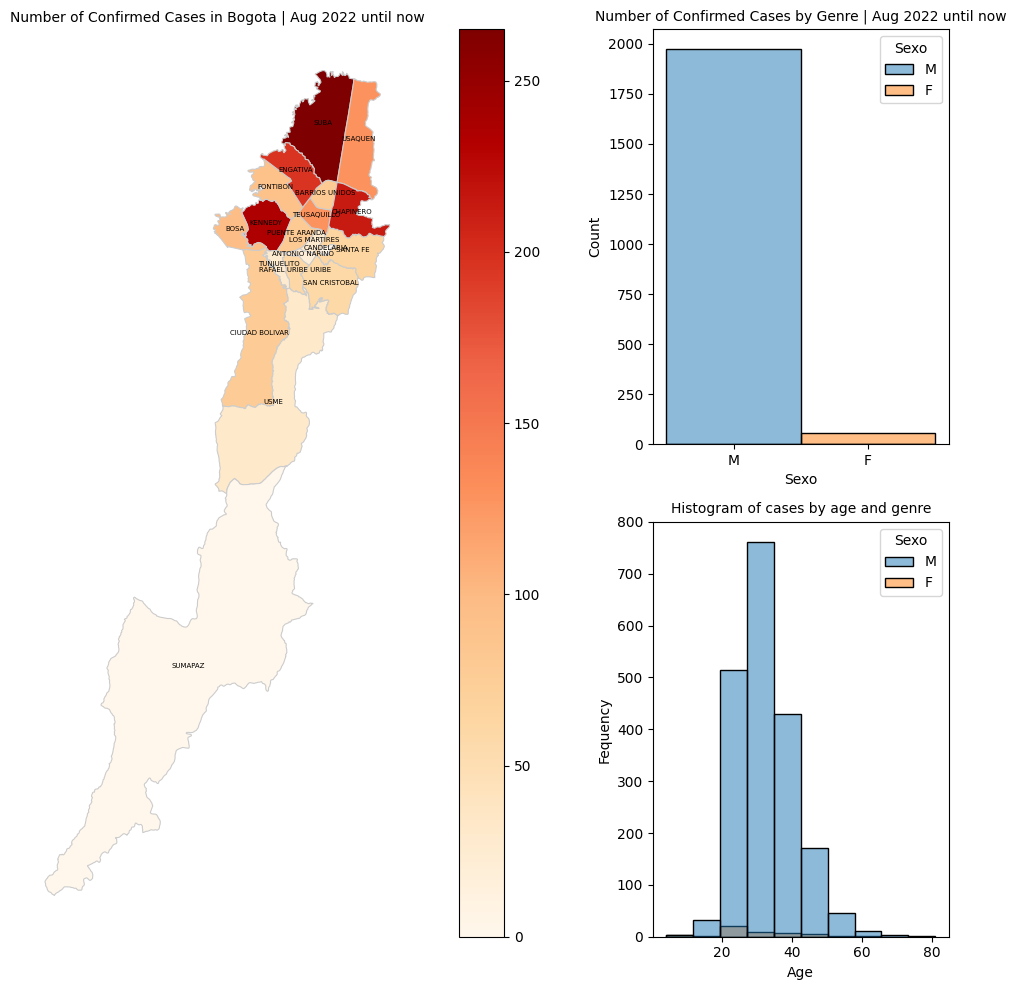

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns

# Assuming your GeoDataFrame is called gdf

# Check if 'Case Count' is populated (this should have been calculated before this step)
if merged_gdf['Case Count'].isnull().all():
    print("The 'Case Count' column is not populated. Please ensure it has been calculated.")

# Creating a 2x2 grid layout with the first column spanning both rows
fig = plt.figure(figsize=(14, 10))  # Increased the figure size for the additional plot
gs = gridspec.GridSpec(2, 2, width_ratios=[7, 2], height_ratios=[1, 1])

# First plot: Map on the left spanning both rows
ax_map = fig.add_subplot(gs[:, 0])  # Span the entire first column
merged_gdf.plot(column='Case Count', cmap='OrRd', linewidth=0.8, ax=ax_map, edgecolor='0.8', legend=True)

# Plot centroids and labels on the map
bogota_projected = merged_gdf.to_crs(epsg=3116)
centroids = bogota_projected.geometry.centroid
centroids_geo = centroids.to_crs(merged_gdf.crs)

for x, y, label in zip(centroids_geo.x, centroids_geo.y, merged_gdf['Nombre de la localidad']):
    ax_map.text(x, y, f'{label}', fontsize=5, ha='center', zorder=1)

ax_map.set_title('Number of Confirmed Cases in Bogota | Aug 2022 until now', fontsize=10)
ax_map.set_axis_off()

# Second plot: Histogram in the top-right
ax_hist_genre = fig.add_subplot(gs[0, 1])
sns.histplot(data=mpox[mpox['Estado_del_Caso'] != 'DESCARTADO'], x='Sexo', hue='Sexo',  stat='count',bins=10, ax=ax_hist_genre)
ax_hist_genre.set_title('Number of Confirmed Cases by Genre | Aug 2022 until now', fontsize=10)

# Thirs plot: Histogram in the bottom-right

ax_hist_genre_age = fig.add_subplot(gs[1, 1])
sns.histplot(data=mpox[mpox['Estado_del_Caso'] != 'DESCARTADO'], x='Edad', hue='Sexo', bins=10, ax=ax_hist_genre_age)
ax_hist_genre_age.set_xlabel('Age')
ax_hist_genre_age.set_ylabel('Fequency')
ax_hist_genre_age.set_title('Histogram of cases by age and genre', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()
